<a href="https://colab.research.google.com/github/mipypf/scej-mi/blob/develop/example_brics_smarts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit==2024.3.5

In [2]:
import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors, Recap, BRICS, rdChemReactions
from rdkit import RDLogger

import warnings

warnings.filterwarnings("ignore")
RDLogger.DisableLog('rdApp.*')

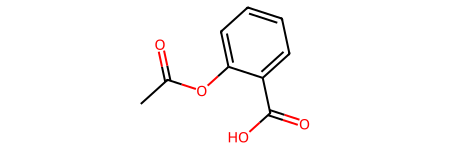

In [3]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"  # アセチルサリチル酸
mol = Chem.MolFromSmiles(smiles)
mol

In [4]:
recap_tree = Recap.RecapDecompose(mol)
recap_tree

In [5]:
fragments_recap = list(recap_tree.GetLeaves().keys())
fragments_recap

['*C(C)=O', '*O', '*Oc1ccccc1C(*)=O', '*C(=O)c1ccccc1*']

In [6]:
fragment_mols_recap = [Chem.MolFromSmiles(f) for f in list(fragments_recap)]
fragment_mols_recap

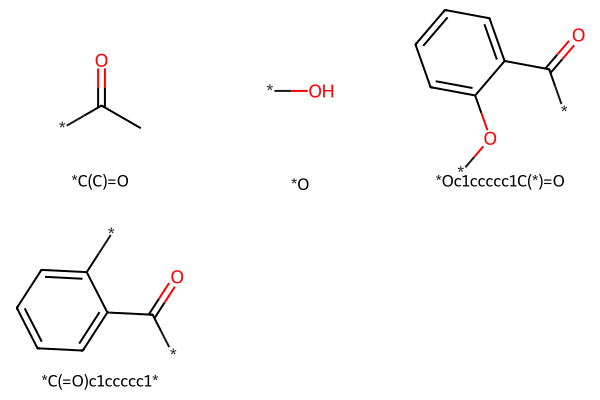

In [7]:
Draw.MolsToGridImage(fragment_mols_recap, molsPerRow=3, subImgSize=(200,200), legends=fragments_recap)

In [8]:
fragments_brics = BRICS.BRICSDecompose(mol)
fragments_brics

{'[1*]C(C)=O', '[16*]c1ccccc1[16*]', '[3*]O[3*]', '[6*]C(=O)O'}

In [9]:
fragment_mols_brics = [Chem.MolFromSmiles(f) for f in fragments_brics]
fragment_mols_brics

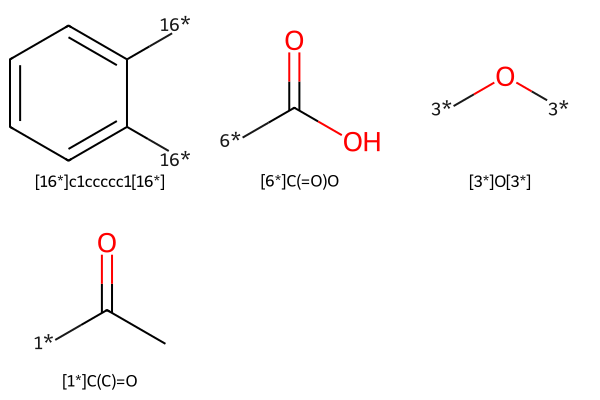

In [10]:
Draw.MolsToGridImage(fragment_mols_brics, molsPerRow=3, subImgSize=(200,200), legends=fragments_brics)

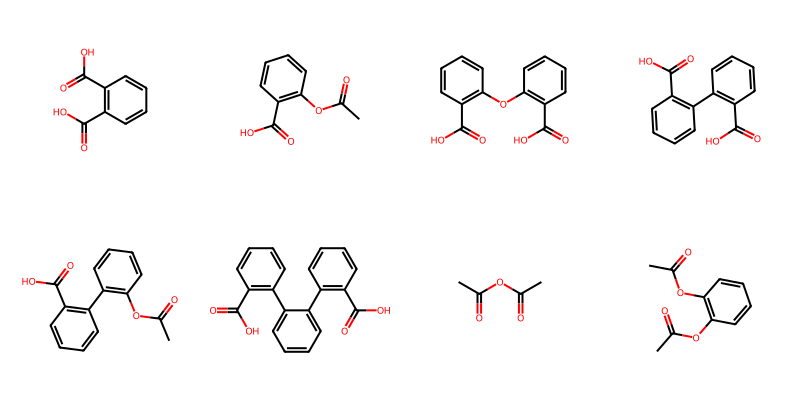

In [11]:
generated_mols_brics_1 = BRICS.BRICSBuild(fragment_mols_brics)

generated_mol_brics_list_1 = [m for m in generated_mols_brics_1]

Draw.MolsToGridImage(generated_mol_brics_list_1, molsPerRow=4, subImgSize=(200,200))

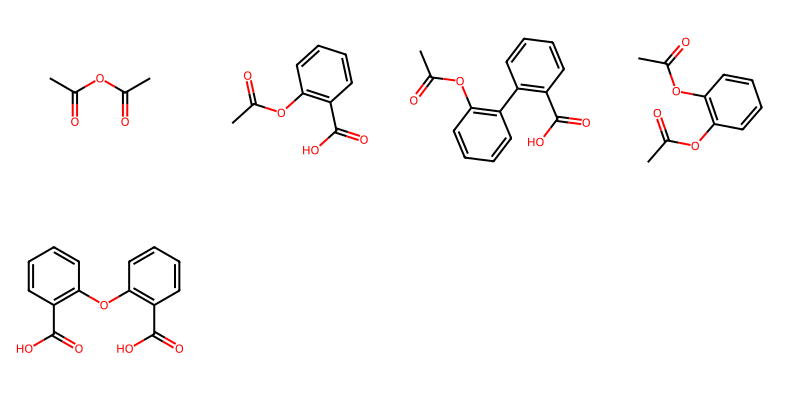

In [12]:
generated_mols_brics_2 = BRICS.BRICSBuild(fragment_mols_brics, seeds=[fragment_mols_brics[2]])

generated_mol_brics_list_2 = [m for m in generated_mols_brics_2]

Draw.MolsToGridImage(generated_mol_brics_list_2, molsPerRow=4, subImgSize=(200,200))

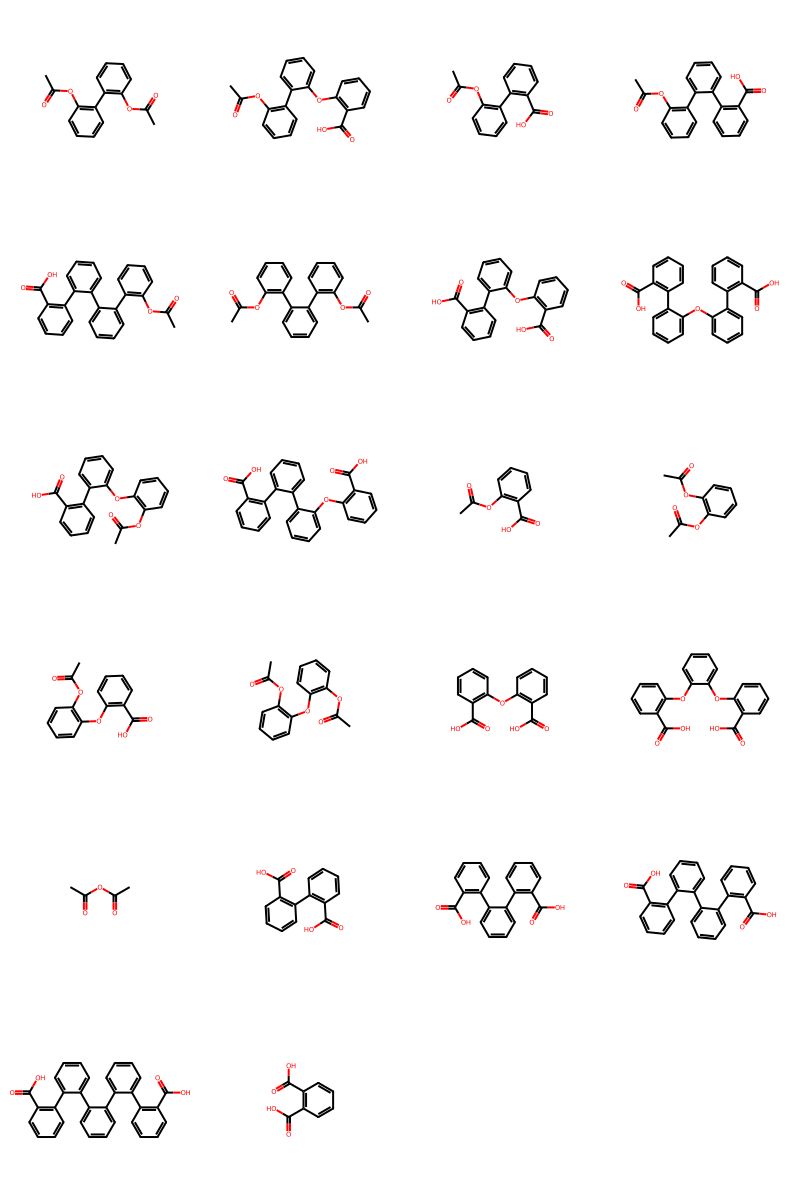

In [13]:
generated_mols_brics_3 = BRICS.BRICSBuild(fragment_mols_brics, maxDepth=5)

generated_mol_brics_list_3 = [m for m in generated_mols_brics_3]

Draw.MolsToGridImage(generated_mol_brics_list_3, molsPerRow=4, subImgSize=(200,200))

In [14]:
smarts = Chem.MolToSmarts(mol)
smarts

'[#6]-[#6](=[#8])-[#8]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#6](=[#8])-[#8]'

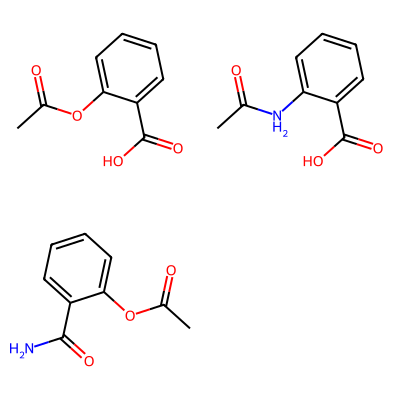

In [15]:
# C:1	→Cは反応前後で変化しないため同じ番号に固定
# O:2 / NH2:2	→同じ番号で「置換対象の対」を表す
rxn = rdChemReactions.ReactionFromSmarts("[C:1](=O)[O:2]>>[C:1](=O)[NH2:2]")

products = rxn.RunReactants((mol,))

product_mols = list({Chem.MolToSmiles(p[0]): p[0] for p in products}.values())

Draw.MolsToGridImage([mol] + product_mols, molsPerRow=2, subImgSize=(200, 200))